<a href="https://colab.research.google.com/github/sh4nk7/AutoML/blob/main/AutoML_nel_Settore_Automobilistico_Predizione_del_Comportamento_di_Acquisto_nel_Settore_Automobilistico_utilizzando_il_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **AutoML nel Settore Automobilistico Predizione del Comportamento di Acquisto nel Settore Automobilistico utilizzando il Machine Learning**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Creiamo una variabile dataset dove tramite la libreria pandas è stato creato il dataset.

In [3]:
dataset = pd.read_csv('Social_Network_Ads.csv')

Conteggio dei valori all'interno del nostro dataset

In [4]:
dataset.count()

User ID            400
Gender             400
Age                400
EstimatedSalary    400
Purchased          400
dtype: int64

Valori in cima al dataset

In [5]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


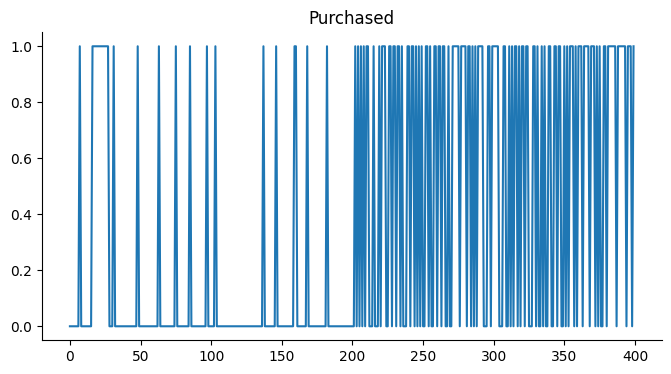

In [6]:
# @title Purchased

from matplotlib import pyplot as plt
dataset['Purchased'].plot(kind='line', figsize=(8, 4), title='Purchased')
plt.gca().spines[['top', 'right']].set_visible(False)

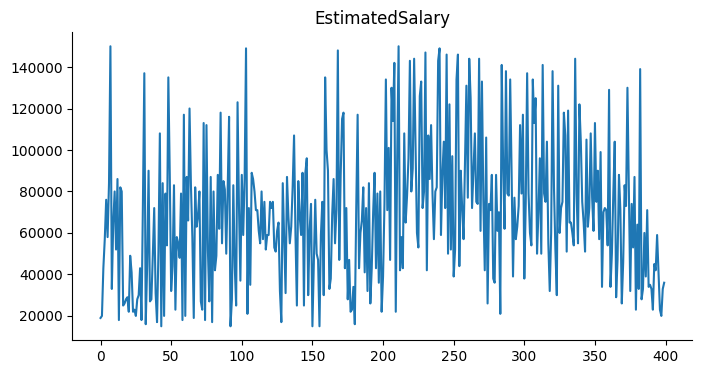

In [7]:
# @title EstimatedSalary

from matplotlib import pyplot as plt
dataset['EstimatedSalary'].plot(kind='line', figsize=(8, 4), title='EstimatedSalary')
plt.gca().spines[['top', 'right']].set_visible(False)

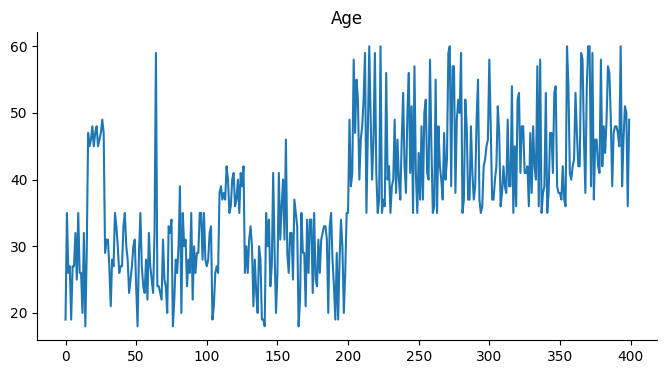

In [8]:
# @title Age

from matplotlib import pyplot as plt
dataset['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

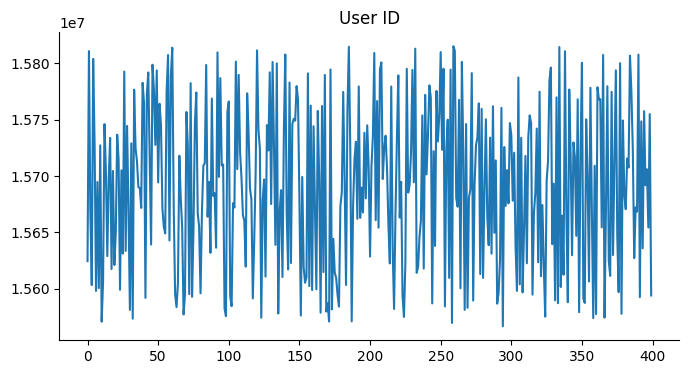

In [9]:
# @title User ID

from matplotlib import pyplot as plt
dataset['User ID'].plot(kind='line', figsize=(8, 4), title='User ID')
plt.gca().spines[['top', 'right']].set_visible(False)

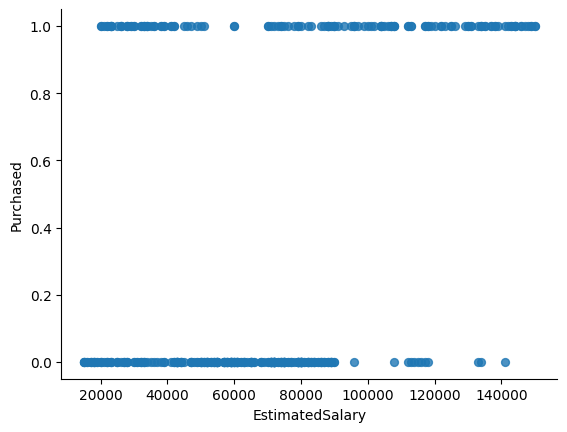

In [10]:
# @title EstimatedSalary vs Purchased

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='EstimatedSalary', y='Purchased', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

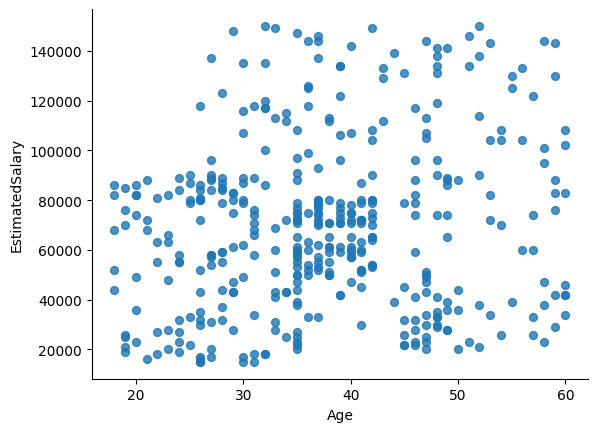

In [11]:
# @title Age vs EstimatedSalary

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='Age', y='EstimatedSalary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

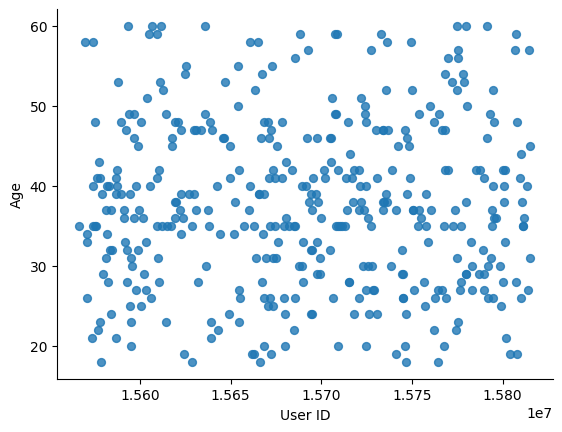

In [12]:
# @title User ID vs Age

from matplotlib import pyplot as plt
dataset.plot(kind='scatter', x='User ID', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

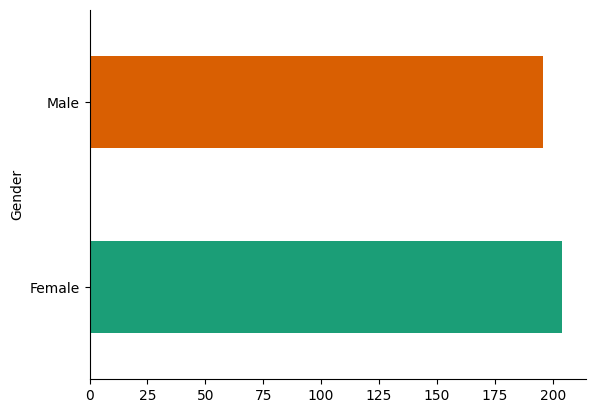

In [13]:
# @title Gender

from matplotlib import pyplot as plt
import seaborn as sns
dataset.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

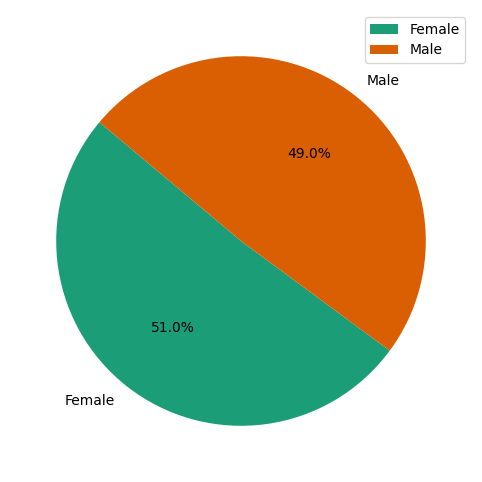

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns

# Creazione del grafico a torta
plt.figure(figsize=(8, 6))  # Impostazione della dimensione della figura
dataset.groupby('Gender').size().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette('Dark2'), startangle=140)

# Rimozione delle spine superiori e destre del grafico
plt.gca().spines[['top', 'right']].set_visible(False)

# Aggiunta di una legenda
plt.legend(loc='upper right')

# Mostra il grafico
plt.show()

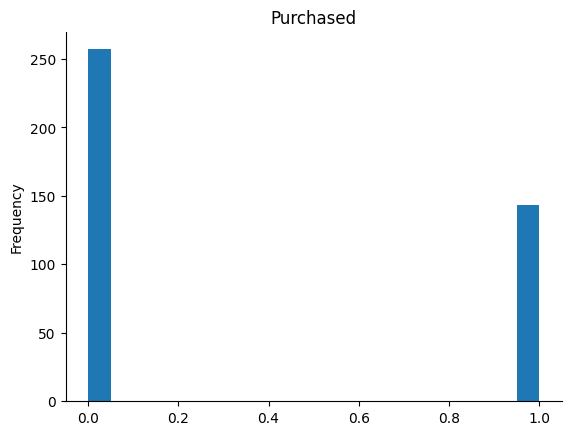

In [15]:
# @title Purchased

from matplotlib import pyplot as plt
dataset['Purchased'].plot(kind='hist', bins=20, title='Purchased')
plt.gca().spines[['top', 'right',]].set_visible(False)

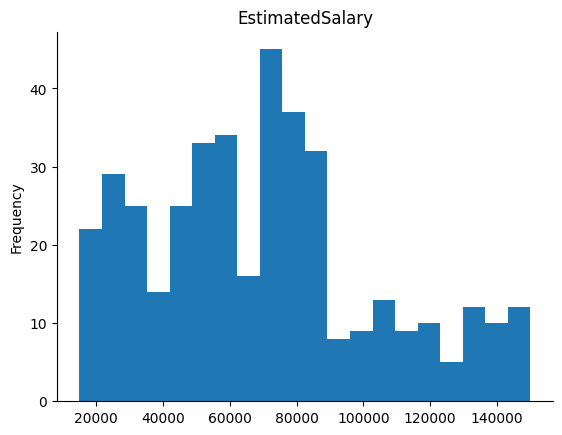

In [16]:
# @title EstimatedSalary

from matplotlib import pyplot as plt
dataset['EstimatedSalary'].plot(kind='hist', bins=20, title='EstimatedSalary')
plt.gca().spines[['top', 'right',]].set_visible(False)

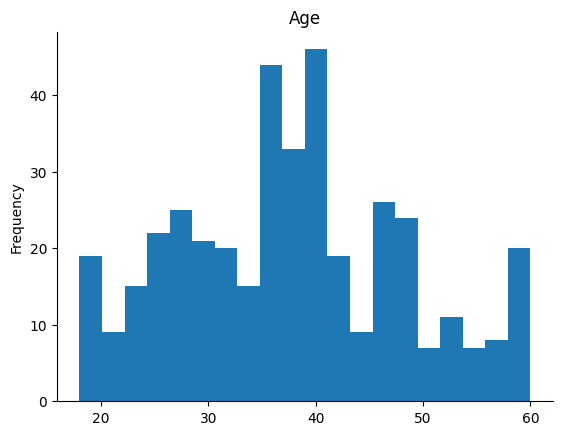

In [17]:
# @title Age

from matplotlib import pyplot as plt
dataset['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

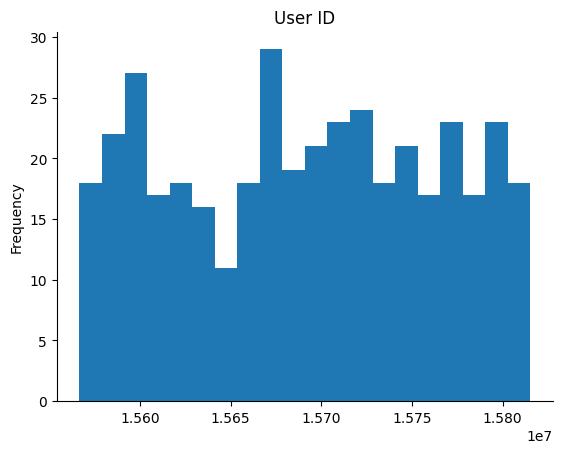

In [18]:
# @title User ID

from matplotlib import pyplot as plt
dataset['User ID'].plot(kind='hist', bins=20, title='User ID')
plt.gca().spines[['top', 'right',]].set_visible(False)

Primi dieci valori nella lista

In [19]:
dataset.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


Coda della lista

In [20]:
dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


Tipo dei dati

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [22]:
dataset.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


Generiamo due dataset nei quali andiamo a inserire in uno solo le persone di sesso maschil (dataset_male) e nell'altro solo le persone di sesso femminile (dataset_female). Utilizzando una funzione di pandas.

In [23]:
dataset_male = dataset.loc[dataset['Gender']== 'Male']
dataset_male.count()
dataset_male.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
8,15600575,Male,25,33000,0


In [24]:
dataset_female = dataset.loc[dataset['Gender']== 'Female']
dataset_female.count()
dataset_female.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
9,15727311,Female,35,65000,0


Preparazione dei dati
Per la preparazione dei dati assegniamo alla variabile $X$ i dati presenti nella colonna 2 e 3.
Alla variabile $y$ si assegna i valori presenti nella quarta colonna (Purchased)

In [25]:
X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

Dividiamo il dataset in training set( insieme di addestramento ) e test set (insieme di test)

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Creazione modello previsionale Perceptron

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


model_classification: ['Perceptron']
score_classification: [0.65]
recall_classification: [0.0]
precision_Perceptron 1.0


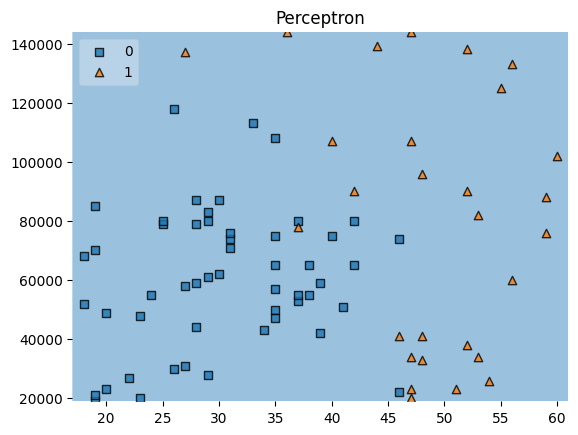

In [27]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Creazione e addestramento del classificatore Perceptron
Perceptron_classification = Perceptron(max_iter=40, tol=0.01, eta0=0.1, random_state=0)
Perceptron_classification.fit(X_train, y_train)

model_classification = []  # Inizializza la lista vuota per memorizzare i modelli
score_classification = []  # Inizializza la lista vuota per memorizzare i punteggi di accuratezza
recall_classification = []  # Inizializza la lista vuota per memorizzare i punteggi di richiamo
precision_classification = []  # Inizializza la lista vuota per memorizzare i punteggi di precisione

# Valutazione delle prestazioni del classificatore sul test set
precision_Perceptron = precision_score(y_test, Perceptron_classification.predict(X_test))
score_Perceptron = accuracy_score(y_test, Perceptron_classification.predict(X_test))
recall_Perceptron = recall_score(y_test, Perceptron_classification.predict(X_test))
precision_Perceptron = precision_score(y_test, Perceptron_classification.predict(X_test), zero_division=1)

# Aggiunta delle metriche alla lista delle prestazioni del modello
model_classification.append('Perceptron')
score_classification.append(score_Perceptron)
recall_classification.append(recall_Perceptron)
precision_classification.append(precision_Perceptron)

# Stampare i valori ottenuti
print("model_classification:", model_classification)
print("score_classification:", score_classification)
print("recall_classification:", recall_classification)
print("precision_Perceptron",precision_Perceptron)

#Per avere una visione d'insieme per visualizzare graficamente le risposte utilizziamo:

from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
plt.title('Perceptron')
plot_decision_regions(X_test, y_test, clf=Perceptron_classification, legend=2)
plt.show()

Per avere una visione d'insieme per visualizzare graficamente le risposte utilizziamo:

Il modello di classificazione a regressione logistica

Modello: Logistic_Regression
Accuratezza: 0.65
Recall: 0.0
Precisione: 0.0


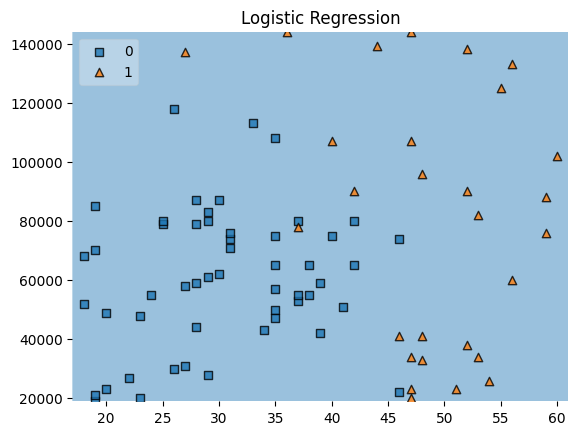

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Creazione e addestramento del modello di regressione logistica
Logistic_Regression_classification = LogisticRegression()
Logistic_Regression_classification.fit(X_train, y_train)

# Inizializzazione delle liste
model_Logistic_Regression = []
scores_Logistic_Regression = []
recalls_Logistic_Regression = []  # Lista per il richiamo
precisions_Logistic_Regression = []  # Lista per la precisione

# Calcolo delle metriche di valutazione
y_pred_Logistic_Regression = Logistic_Regression_classification.predict(X_test)
score_Logistic_Regression = accuracy_score(y_test, y_pred_Logistic_Regression)
recall_Logistic_Regression = recall_score(y_test, y_pred_Logistic_Regression)
precision_Logistic_Regression = precision_score(y_test, y_pred_Logistic_Regression, zero_division=0)

# Aggiunta del modello alla lista dei modelli
model_Logistic_Regression.append('Logistic_Regression')

# Aggiunta del punteggio di accuratezza alla lista dei punteggi
scores_Logistic_Regression.append(score_Logistic_Regression)

# Aggiunta del punteggio di richiamo alla lista dei punteggi
recalls_Logistic_Regression.append(recall_Logistic_Regression)

# Aggiunta del punteggio di precisione alla lista dei punteggi
precisions_Logistic_Regression.append(precision_Logistic_Regression)

# Stampa dei risultati
print("Modello:", model_Logistic_Regression[0])
print("Accuratezza:", scores_Logistic_Regression[0])
print("Recall:", recalls_Logistic_Regression[0])
print("Precisione:", precisions_Logistic_Regression[0])

# Visualizzazione delle regioni decisionali
plot_decision_regions(X_test, y_test, clf=Logistic_Regression_classification, legend=2)
plt.title('Logistic Regression')
plt.show()



Modello Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Creazione e addestramento del modello Random Forest
RandomForest_classification = RandomForestClassifier(random_state=5)
RandomForest_classification.fit(X_train, y_train)

# Inizializzazione delle liste se non sono già definite
model_classification = []
score_classification = []
recall_classification = []
precision_classification = []

# Calcolo delle metriche di valutazione
y_pred_RandomForest = RandomForest_classification.predict(X_test)
score_RandomForest = accuracy_score(y_test, y_pred_RandomForest)
recall_RandomForest = recall_score(y_test, y_pred_RandomForest)
precision_RandomForest = precision_score(y_test, y_pred_RandomForest, zero_division=0)

# Aggiunta del modello alla lista dei modelli
model_classification.append('Random Forest')

# Aggiunta del punteggio di accuratezza alla lista dei punteggi
score_classification.append(score_RandomForest)

# Aggiunta del punteggio di richiamo alla lista dei punteggi
recall_classification.append(recall_RandomForest)

# Aggiunta del punteggio di precisione alla lista dei punteggi
precision_classification.append(precision_RandomForest)

# Stampa dei risultati
print("Modello:", model_classification[0])
print("Accuratezza:", score_classification[0])
print("Recall:", recall_classification[0])
print("Precisione:", precision_classification[0])




Modello: Random Forest
Accuratezza: 0.9
Recall: 0.9285714285714286
Precisione: 0.8125


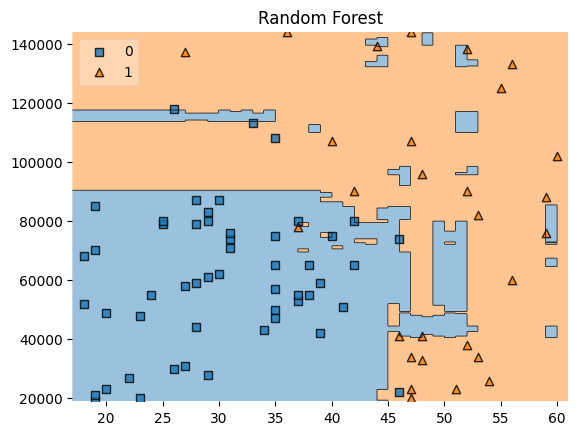

In [30]:
# Visualizzazione delle regioni decisionali
plot_decision_regions(X_test, y_test, clf=RandomForest_classification, legend=2)
plt.title('Random Forest')
plt.show()

Modello Gradient Boosting

Modello: Gradient Boosting
Accuratezza: 0.8625
Recall: 0.7857142857142857
Precisione: 0.8148148148148148


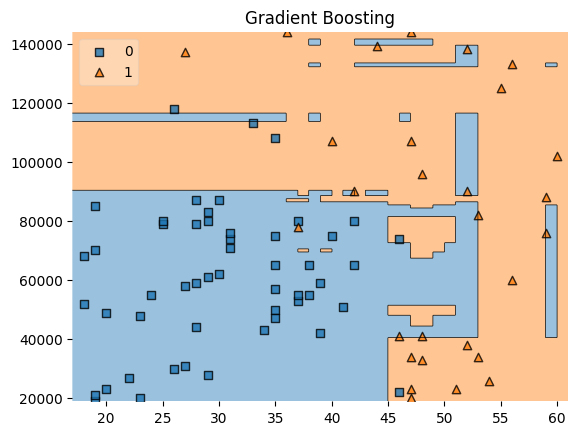

In [31]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Creazione e addestramento del modello Gradient Boosting
GradientBoosting_classification = GradientBoostingClassifier(random_state=5)
GradientBoosting_classification.fit(X_train, y_train)

# Inizializzazione delle liste se non sono già definite
model_classification = []
score_classification = []
recall_classification = []
precision_classification = []

# Calcolo delle metriche di valutazione
y_pred_GradientBoosting = GradientBoosting_classification.predict(X_test)
score_GradientBoosting = accuracy_score(y_test, y_pred_GradientBoosting)
recall_GradientBoosting = recall_score(y_test, y_pred_GradientBoosting)
precision_GradientBoosting = precision_score(y_test, y_pred_GradientBoosting, zero_division=0)

# Aggiunta del modello alla lista dei modelli
model_classification.append('Gradient Boosting')

# Aggiunta del punteggio di accuratezza alla lista dei punteggi
score_classification.append(score_GradientBoosting)

# Aggiunta del punteggio di richiamo alla lista dei punteggi
recall_classification.append(recall_GradientBoosting)

# Aggiunta del punteggio di precisione alla lista dei punteggi
precision_classification.append(precision_GradientBoosting)

# Stampa dei risultati
print("Modello:", model_classification[0])
print("Accuratezza:", score_classification[0])
print("Recall:", recall_classification[0])
print("Precisione:", precision_classification[0])

# Visualizzazione delle regioni decisionali
plot_decision_regions(X_test, y_test, clf=GradientBoosting_classification, legend=2)
plt.title('Gradient Boosting')
plt.show()


Modello AdaBoostClassifier

Modello: AdaBoostClassifier
Accuratezza: 0.8875
Recall: 0.75
Precisione: 0.9130434782608695


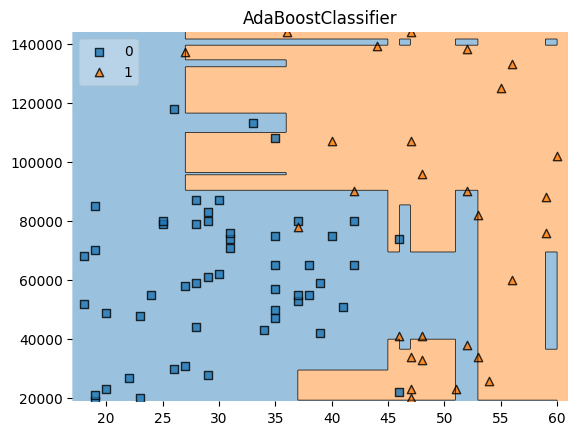

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Creazione e addestramento del modello AdaBoostClassifier
AdaBoost_classification = AdaBoostClassifier(random_state=5)
AdaBoost_classification.fit(X_train, y_train)

# Inizializzazione delle liste se non sono già definite
model_classification = []
score_classification = []
recall_classification = []
precision_classification = []

# Calcolo delle metriche di valutazione
y_pred_AdaBoost = AdaBoost_classification.predict(X_test)
score_AdaBoost = accuracy_score(y_test, y_pred_AdaBoost)
recall_AdaBoost = recall_score(y_test, y_pred_AdaBoost)
precision_AdaBoost = precision_score(y_test, y_pred_AdaBoost, zero_division=0)

# Aggiunta del modello alla lista dei modelli
model_classification.append('AdaBoostClassifier')

# Aggiunta del punteggio di accuratezza alla lista dei punteggi
score_classification.append(score_AdaBoost)

# Aggiunta del punteggio di richiamo alla lista dei punteggi
recall_classification.append(recall_AdaBoost)

# Aggiunta del punteggio di precisione alla lista dei punteggi
precision_classification.append(precision_AdaBoost)

# Stampa dei risultati
print("Modello:", model_classification[0])
print("Accuratezza:", score_classification[0])
print("Recall:", recall_classification[0])
print("Precisione:", precision_classification[0])

# Visualizzazione delle regioni decisionali
plot_decision_regions(X_test, y_test, clf=AdaBoost_classification, legend=2)
plt.title('AdaBoostClassifier')
plt.show()


Support Vector Classifier (SVC)

Modello: SVC
Accuratezza: 0.7375
Recall: 0.35714285714285715
Precisione: 0.7692307692307693


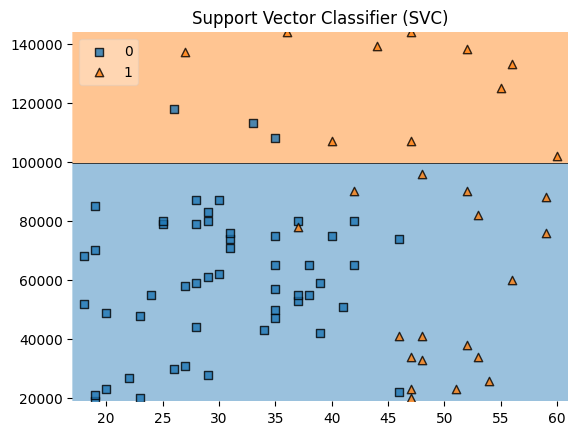

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Creazione e addestramento del modello SVC
SVC_classification = SVC(random_state=5)
SVC_classification.fit(X_train, y_train)

# Inizializzazione delle liste se non sono già definite
model_classification = []
score_classification = []
recall_classification = []
precision_classification = []

# Calcolo delle metriche di valutazione
y_pred_SVC = SVC_classification.predict(X_test)
score_SVC = accuracy_score(y_test, y_pred_SVC)
recall_SVC = recall_score(y_test, y_pred_SVC)
precision_SVC = precision_score(y_test, y_pred_SVC, zero_division=0)

# Aggiunta del modello alla lista dei modelli
model_classification.append('SVC')

# Aggiunta del punteggio di accuratezza alla lista dei punteggi
score_classification.append(score_SVC)

# Aggiunta del punteggio di richiamo alla lista dei punteggi
recall_classification.append(recall_SVC)

# Aggiunta del punteggio di precisione alla lista dei punteggi
precision_classification.append(precision_SVC)

# Stampa dei risultati
print("Modello:", model_classification[0])
print("Accuratezza:", score_classification[0])
print("Recall:", recall_classification[0])
print("Precisione:", precision_classification[0])

# Visualizzazione delle regioni decisionali
plot_decision_regions(X_test, y_test, clf=SVC_classification, legend=2)
plt.title('Support Vector Classifier (SVC)')
plt.show()


Modello: Naive Bayes Gaussiano
Accuratezza: 0.925
Recall: 0.8571428571428571
Precisione: 0.9230769230769231


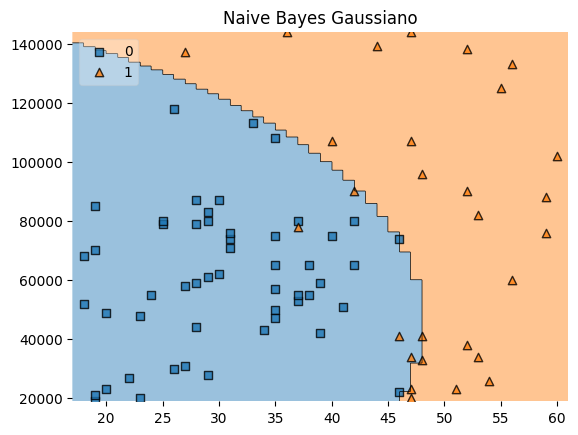

In [34]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, recall_score, precision_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Creazione e addestramento del modello Gaussian Naive Bayes
NB_classification = GaussianNB()
NB_classification.fit(X_train, y_train)

# Inizializzazione delle liste se non sono già definite
model_classification = []
score_classification = []
recall_classification = []
precision_classification = []

# Calcolo delle metriche di valutazione
y_pred_NB = NB_classification.predict(X_test)
score_NB = accuracy_score(y_test, y_pred_NB)
recall_NB = recall_score(y_test, y_pred_NB)
precision_NB = precision_score(y_test, y_pred_NB)

# Aggiunta del modello alla lista dei modelli
model_classification.append('Naive Bayes Gaussiano')

# Aggiunta del punteggio di accuratezza alla lista dei punteggi
score_classification.append(score_NB)

# Aggiunta del punteggio di richiamo alla lista dei punteggi
recall_classification.append(recall_NB)

# Aggiunta del punteggio di precisione alla lista dei punteggi
precision_classification.append(precision_NB)

# Stampa dei risultati
print("Modello:", model_classification[0])
print("Accuratezza:", score_classification[0])
print("Recall:", recall_classification[0])
print("Precisione:", precision_classification[0])

# Visualizzazione delle regioni decisionali
plot_decision_regions(X_test, y_test, clf=NB_classification, legend=2)
plt.title('Naive Bayes Gaussiano')
plt.show()


 il classificatore K-nearest Neighbors (KNN)

Modello: K-nearest Neighbors (KNN)
Accuratezza: 0.825
Recall: 0.7142857142857143
Precisione: 0.7692307692307693


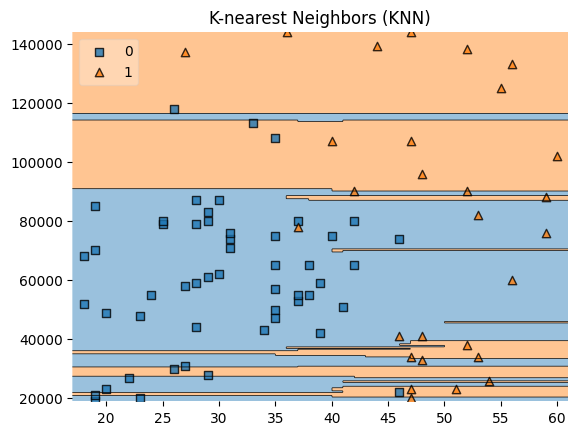

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Creazione e addestramento del classificatore KNN
KNN_classifier = KNeighborsClassifier()
KNN_classifier.fit(X_train, y_train)

# Inizializzazione delle liste per memorizzare le metriche di valutazione
model_classification = []
score_classification = []
recall_classification = []
precision_classification = []

# Calcolo delle metriche di valutazione
y_pred_KNN = KNN_classifier.predict(X_test)
score_KNN = accuracy_score(y_test, y_pred_KNN)
recall_KNN = recall_score(y_test, y_pred_KNN)
precision_KNN = precision_score(y_test, y_pred_KNN)

# Aggiunta del modello alla lista dei modelli
model_classification.append('K-nearest Neighbors (KNN)')

# Aggiunta del punteggio di accuratezza alla lista dei punteggi
score_classification.append(score_KNN)

# Aggiunta del punteggio di richiamo alla lista dei punteggi
recall_classification.append(recall_KNN)

# Aggiunta del punteggio di precisione alla lista dei punteggi
precision_classification.append(precision_KNN)

# Stampa dei risultati
print("Modello:", model_classification[0])
print("Accuratezza:", score_classification[0])
print("Recall:", recall_classification[0])
print("Precisione:", precision_classification[0])

# Visualizzazione delle regioni decisionali
plot_decision_regions(X_test, y_test, clf=KNN_classifier, legend=2)
plt.title('K-nearest Neighbors (KNN)')
plt.show()


Questo codice creerà un grafico a barre che mostra le performance di ciascun modello in termini di accuratezza, recall e precision. Assicurati di aver calcolato queste metriche per ogni modello prima di eseguire questo codice.

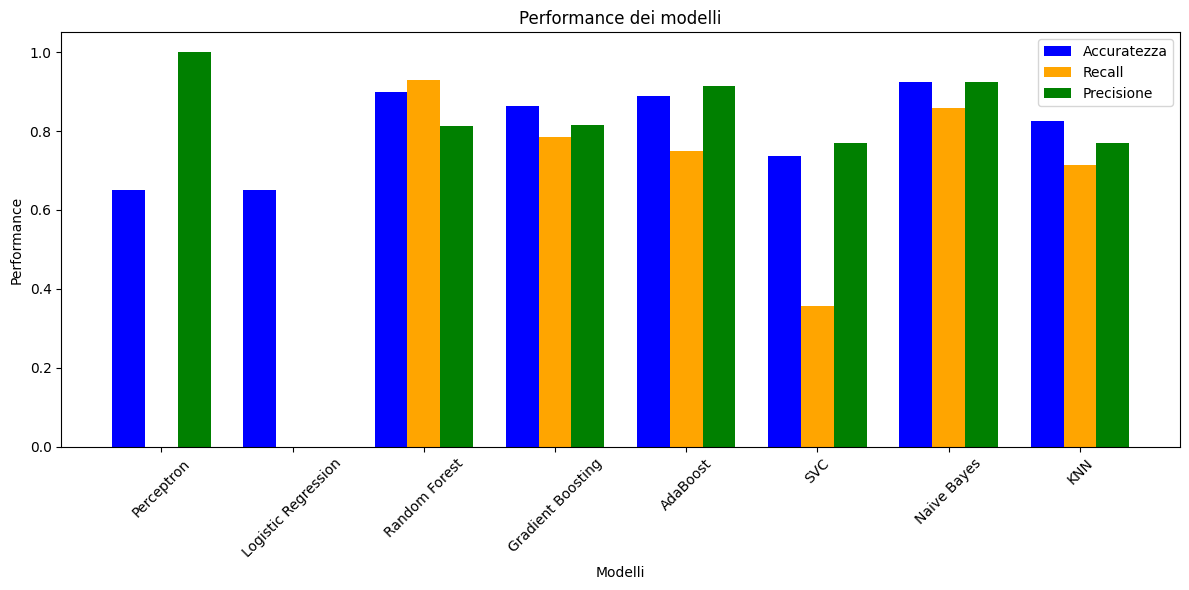

In [36]:
import matplotlib.pyplot as plt

# Lista dei modelli
models = ['Perceptron', 'Logistic Regression', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'SVC', 'Naive Bayes', 'KNN']

# Lista delle metriche di valutazione per ogni modello
accuracies = [score_Perceptron, score_Logistic_Regression, score_RandomForest, score_GradientBoosting, score_AdaBoost, score_SVC, score_NB, score_KNN]
recalls = [recall_Perceptron, recall_Logistic_Regression, recall_RandomForest, recall_GradientBoosting, recall_AdaBoost, recall_SVC, recall_NB, recall_KNN]
precisions = [precision_Perceptron, precision_Logistic_Regression, precision_RandomForest, precision_GradientBoosting, precision_AdaBoost, precision_SVC, precision_NB, precision_KNN]

# Larghezza delle barre
bar_width = 0.25

# Posizione delle barre
index = range(len(models))

# Creazione del grafico
plt.figure(figsize=(12, 6))

# Plot delle metriche di valutazione per ogni modello
plt.bar(index, accuracies, bar_width, color='blue', label='Accuratezza')
plt.bar([i + bar_width for i in index], recalls, bar_width, color='orange', label='Recall')
plt.bar([i + 2 * bar_width for i in index], precisions, bar_width, color='green', label='Precisione')

# Aggiunta di titoli e etichette
plt.title('Performance dei modelli')
plt.xlabel('Modelli')
plt.ylabel('Performance')
plt.xticks([i + bar_width for i in index], models, rotation=45)
plt.legend()

# Mostra il grafico
plt.tight_layout()
plt.show()


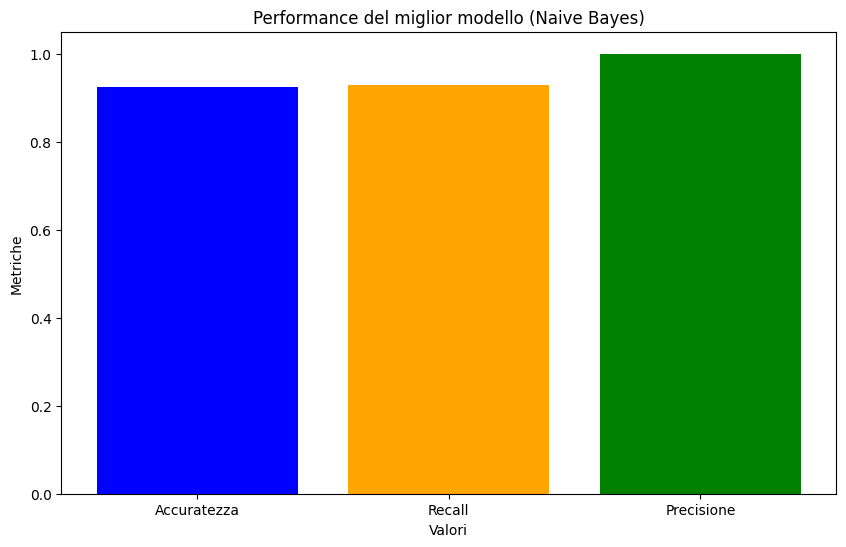

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Lista dei modelli
models = ['Perceptron', 'Logistic Regression', 'Random Forest', 'Gradient Boosting', 'AdaBoost', 'SVC', 'Naive Bayes', 'KNN']

# Liste delle metriche di valutazione per ogni modello
accuracies = [score_Perceptron, score_Logistic_Regression, score_RandomForest, score_GradientBoosting, score_AdaBoost, score_SVC, score_NB, score_KNN]
recalls = [recall_Perceptron, recall_Logistic_Regression, recall_RandomForest, recall_GradientBoosting, recall_AdaBoost, recall_SVC, recall_NB, recall_KNN]
precisions = [precision_Perceptron, precision_Logistic_Regression, precision_RandomForest, precision_GradientBoosting, precision_AdaBoost, precision_SVC, precision_NB, precision_KNN]

# Trova il modello migliore per ciascuna metrica
best_accuracy_model = models[np.argmax(accuracies)]
best_recall_model = models[np.argmax(recalls)]
best_precision_model = models[np.argmax(precisions)]

# Lista dei valori per il modello migliore
best_accuracy_value = np.max(accuracies)
best_recall_value = np.max(recalls)
best_precision_value = np.max(precisions)

# Plot dei valori per il modello migliore
plt.figure(figsize=(10, 6))
plt.bar(['Accuratezza', 'Recall', 'Precisione'], [best_accuracy_value, best_recall_value, best_precision_value], color=['blue', 'orange', 'green'])
plt.title('Performance del miglior modello ({})'.format(best_accuracy_model))
plt.ylabel('Metriche')
plt.xlabel('Valori')
plt.show()


In [38]:
# Calcola la media delle metriche per ciascun modello
mean_scores = [(score + recall + precision) / 3 for score, recall, precision in zip(accuracies, recalls, precisions)]

# Trova l'indice del modello con la media più alta
best_model_index = np.argmax(mean_scores)

# Ottieni il nome del modello migliore e la sua media
best_model = models[best_model_index]
best_model_mean_score = mean_scores[best_model_index]

print("Modello migliore (basato sulla media):", best_model)
print("Media delle metriche:", best_model_mean_score)

Modello migliore (basato sulla media): Naive Bayes
Media delle metriche: 0.9017399267399266


In [39]:
from sklearn.metrics import confusion_matrix

# Ottieni le previsioni del modello Naive Bayes
y_pred_NB = NB_classification.predict(X_test)

# Calcola la matrice di confusione per il modello Naive Bayes
conf_matrix_NB = confusion_matrix(y_test, y_pred_NB)

# Visualizza la matrice di confusione
print("Matrice di confusione del modello Naive Bayes:")
print(conf_matrix_NB)

Matrice di confusione del modello Naive Bayes:
[[50  2]
 [ 4 24]]


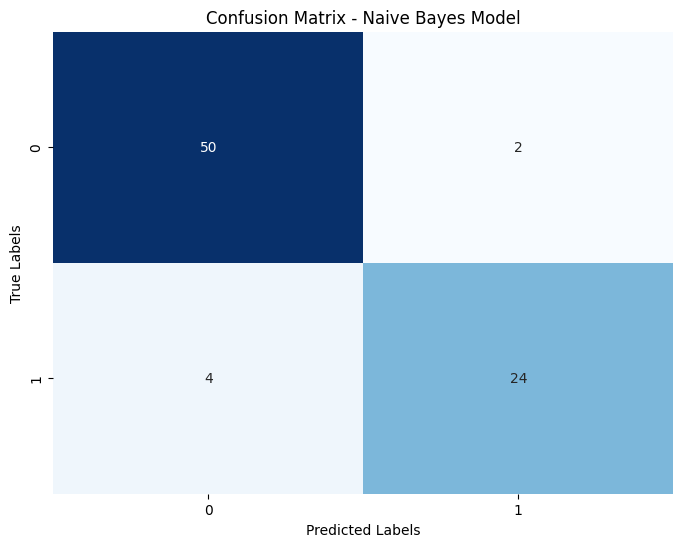

In [40]:
import seaborn as sns

# Plot della matrice di confusione
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_NB, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Naive Bayes Model')
plt.show()